In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Digits recognizer
### Recognition of handwritten digits

## Data
- Dataset from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data)
- The original dataset of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples
- The Kaggle dataset contains two files - `train.csv` and `test.csv` - both of them contain handwritten digits, from zero through nine
- Each image is **28** pixels in height and **28** pixels in width, which is **784** pixels in total
- Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between **0 and 255**, inclusive
- The training data set, (**train.csv**), has **785 columns**. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image. The file contains **42000 observations**
- Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as **x = i * 28 + j**, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero)
    - For example, pixel32 indicates the pixel that is in the fifth column from the left, and the second row from the top
- The test data set, (**test.csv**), is the same as the training set, except that it does not contain the "label" column
- We will use only the **train.csv** in order to split the data by ourselves

## Loading and observing the data

In [4]:
data = pd.read_csv('data/train.csv')

In [5]:
data.head(6)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.shape

(42000, 785)

In [8]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Visualizing the data

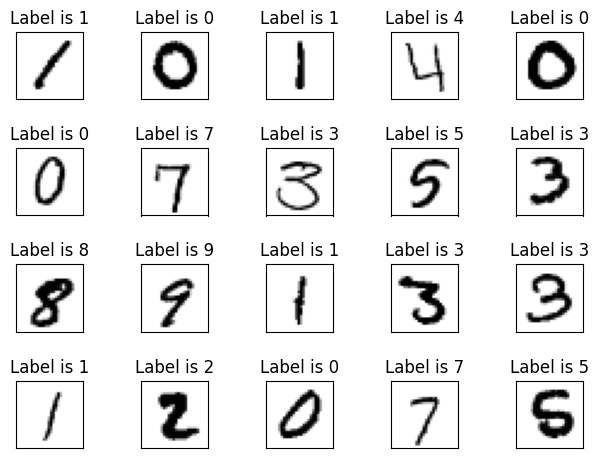

In [21]:
# Plots a single image
def plot_digit(row, w = 28, h = 28, labels = True):
    if labels:
        # the first column contains the label
        label = row.iloc[0]
        # The rest of columns are pixels
        pixels = row[1:]
    else:
        label = ''
        # The rest of columns are pixels
        pixels = row[0:]
    
#    print(row.shape, pixels.shape)
        

    # Make those columns into a array of 8-bits pixels
    # This array will be of 1D with length 784
    # The pixel intensity values are integers from 0 to 255
    pixels = 255 - np.array(pixels, dtype = 'uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((w, h))

    # Plot
    if labels:
        plt.title('Label is {label}'.format(label = label))
    plt.imshow(pixels, cmap = 'gray')


# Plot pictures
def plot_digits(images, size_w = 28, size_h = 28, labels = True, images_per_row = 5):
    images_count = images.shape[0]
    h = np.ceil(images_count / images_per_row).astype(int)
    fig, plots = plt.subplots(h, images_per_row)
    fig.tight_layout()

    for n in range(0, images_count):
        s = plt.subplot(h, images_per_row, n + 1)
        s.set_xticks(())
        s.set_yticks(())
        plot_digit(images.iloc[n], size_w, size_h, labels)
    plt.show()


plot_digits(data[0:20])